### COMP41680 - Data Science in Python Assignment 1 - Philip Corr - 12318581

#### Task 1: Choose a suitable project, API and data source
The aim of this data science project is to investigate the relationship between media publishers and the value of Sterling. Bloomberg and The Guardian were used in this case. The value of the sterling, at the time of release of the corresponding media, is also obtained through the Quandl API. IBM Watson's Discovery API provides access to the discovery news data set. This is a public data set which has been enriched with cognitive insights and is updated continuosly with 300,000 new articles added daily.

In [1]:
import sys,pprint
import os
import json
import watson_developer_cloud
import quandl
import config
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(),'..'))


ModuleNotFoundError: No module named 'watson_developer_cloud'

#### API keys are required for accessing both the watson discovery api and Quandl api

In [169]:
# Watson can only return a maximum of 50 queries at a time
watson_iterations= 20
watson_count = 50

# Files names to store data
financial_file_name = "sterling_to_euro.csv"
watson_hosts_file_name = "watson_hosts.json"
watson_general_file_name = "watson_general.json"
watson_pretty_hosts_file_name = "watson_hosts_pretty.json"
watson_pretty_general_file_name = "watson_general_pretty.json"

# Media publishers to be used
hosts = ['www.theguardian.com','www.bloomberg.com']

# Set up API Access
quandl.ApiConfig.api_key =  config.QUANDL_KEY
discovery = watson_developer_cloud.DiscoveryV1(
    username=config.WATSON_USERNAME,
    password=config.WATSON_PASSWORD,
    version=config.WATSON_VERSION
)


#### Functions to create, write and read file

In [170]:
# Query Quandl for Sterling Value
def get_financial_data():
    # Get data for past 3 months
    data = quandl.get("BOE/XUDLSER", start_date="2017-2-2", end_date="2017-4-5")
    # print("Financial Data:")
    # print(type(data))
    # print(data)
    return (data)

# Write Sterling values to file
def write_financial_data(file_name, data):
    # with takes care of closing file in python
    with open(file_name, 'w') as outfile:
        data.to_csv(outfile)
    outfile.close()

# Write Watson responses to JSON file
def write_watson_data(file_name, data):
    with open(file_name, 'w') as outfile:
        outfile.write(json.dumps(data, outfile))
        # Use this to write dictionaries
        # seperate into responses returned from watson
        # for response in data:
        #     # Each response from watson contains 50 results
        #     for result in response['results']:
        #         outfile.write(json.dumps(result, outfile))
        #         outfile.write('\n')
    # python closes file at end of function scope but no harm in being explicit
    outfile.close()

# Output Watson responses in readable JSON format
def write_watson_data_pretty(file_name, data):
    with open(file_name, 'w') as outfile:
        # Use this to write dictionaries
        # seperate into responses returned from watson
        for response in data:
            # Each response from watson contains 50 results
            outfile.write(json.dumps(response, outfile))
            outfile.write('\n')
    # python closes file at end of function scope but no harm in being explicit
    outfile.close()

# Query Watson for Media
def get_watson_data(query, filter, watson_index, watson_count):
    # get environment for this service instance
    environments = discovery.get_environments()
    # pp.pprint(environments)

    # identify the news environment using list comprehensions
    news_environments = [x for x in environments['environments'] if
                         x['name'] == 'Watson News Environment']
    # parse JSON for news environment id
    news_environment_id = news_environments[0]['environment_id']
    # pp.pprint(news_environment_id)

    # get news collection from news environment
    collections = discovery.list_collections(news_environment_id)
    news_collections = [x for x in collections['collections']]
    news_collection_id = news_collections[0]['collection_id']
    # pp.pprint(news_collection_id)
    # pp.pprint(collections)

    # Set query filters and get response
    qopts = {
        'query': query,
        'count': str(watson_count),
        'offset': str(watson_count * watson_index),
        'return': filter
    }
    watson_response = discovery.query(news_environment_id, news_collection_id, qopts)
    print(type(watson_response))
    # print(json.dumps(watson_response, indent=2))
    return watson_response

# Create a query to send. use_hosts specifies if certain media providers should be used
def create_watson_query(use_hosts):
    watson_data = []
    if use_hosts:
        for host in hosts:
            for watson_index in range(watson_iterations):
                # Query specifies what we want
                query = 'entities.text:brexit,pound,publicationDate.confident:yes,blekko.host:' + host
                # Filter specifies what sections to return
                filter = 'publicationDate,entities.sentiment,entities.text,blekko.snippet,blekko.host',
                watson_response = (get_watson_data(query, filter, watson_index, watson_count))

                # add results to total response
                watson_entities = watson_response['results']
                watson_data.extend(watson_entities)
        return watson_data
    else:
        for watson_index in range(watson_iterations):
            # Query specifies what we want
            query = 'entities.text:brexit,pound,publicationDate.confident:yes'
            # Filter specifies what sections to return
            filter = 'publicationDate,entities.sentiment,entities.text',
            watson_response = (get_watson_data(query, filter, watson_index, watson_count))

            # add results to total response
            watson_entities = watson_response['results']
            watson_data.extend(watson_entities)
        return watson_data


# Helper function to replace list of nested dictionary with value
def reduce_dict_list(entity_list):
    print("entity List:")
    print(entity_list)
    for analysed_text in entity_list:
        if 'sentiment' in analysed_text and 'score' in analysed_text['sentiment'] and analysed_text['text'] == "Brexit":
            return analysed_text['sentiment']['score']
        else:
            return None

#### Request Watson and Sterling exchange Data

In [171]:
# get financial data
financial_data = get_financial_data()

# get Watson Data
watson_host_data = create_watson_query(use_hosts = True)
watson_general_data = create_watson_query(use_hosts = False)


<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


#### Write Collected Data to Files

In [172]:
# Write Quandle exchange rate data to CSV file
write_financial_data(financial_file_name, financial_data)

# Write watson sentiment analysis to json files
write_watson_data(watson_hosts_file_name, watson_host_data)
write_watson_data(watson_general_file_name, watson_general_data)

# write watson data in readable format
write_watson_data_pretty(watson_pretty_hosts_file_name, watson_host_data)
write_watson_data_pretty(watson_pretty_general_file_name, watson_host_data)


#### Read in From Data Files

In [173]:
# with takes care of closing file after reading
with open(watson_hosts_file_name) as data_file:
    watson_hosts_data = json.load(data_file)

with open(watson_general_file_name) as data_file:
    watson_general_data = json.load(data_file)

with open(financial_file_name) as data_file:
    financial_data = pd.read_csv(data_file)


#### Format Data into Pandas DataFrame

In [174]:
watson_dfs = []
watson_dfs.append(pd.DataFrame(watson_hosts_data))
watson_dfs.append(pd.DataFrame(watson_general_data))

financial_df = pd.DataFrame(financial_data)

for (df_index, watson_df) in enumerate(watson_dfs):
    watson_df.drop(['id', 'score'], axis=1, inplace=True)
    # Extract values from dictionaries
    watson_df = pd.concat(
        [watson_df.drop('publicationDate', axis=1), pd.DataFrame(watson_df['publicationDate'].tolist())], axis=1)

    if df_index == 0:
        watson_df = pd.concat([watson_df.drop('blekko', axis=1), pd.DataFrame(watson_df['blekko'].tolist())], axis=1)


    watson_df = pd.concat([watson_df.drop('entities', axis=1), watson_df['entities'].apply(reduce_dict_list)], axis=1)
    watson_df = pd.concat(
        [watson_df.drop('entities', axis=1), pd.DataFrame(watson_df['entities'].tolist(), columns=['score'])], axis=1)
    watson_df = watson_df[watson_df.score.notnull()]
    
    # Format dates columns into dateTime structure
    watson_df['date'] = watson_df.date.str[:8]
    watson_df['date'] = pd.to_datetime(watson_df['date'], format='%Y%m%d')
    watson_df.set_index('date')
    watson_df['score'] = watson_df.score.astype(float)
    watson_dfs[df_index] = watson_df

financial_df['Date'] = pd.to_datetime(financial_df['Date'], format='%Y-%m-%d')
financial_df.set_index('Date')


entity List:
[{'sentiment': {'type': 'neutral'}, 'text': 'Tom Hall'}, {'sentiment': {'type': 'neutral'}, 'text': 'Europe'}, {'sentiment': {'score': '-0.705998', 'type': 'negative'}, 'text': 'Brexit'}, {'sentiment': {'type': 'neutral'}, 'text': 'GuardianWitness'}, {'sentiment': {'score': '0.284283', 'type': 'positive'}, 'text': '£200'}, {'sentiment': {'score': '0.284283', 'type': 'positive'}, 'text': 'UK.hotels.com'}]
entity List:
[{'sentiment': {'score': '-0.470835', 'type': 'negative'}, 'text': 'interest rates'}, {'sentiment': {'score': '-0.424788', 'type': 'negative'}, 'text': 'Bank of England'}, {'sentiment': {'score': '-0.725458', 'type': 'negative'}, 'text': 'Office for National Statistics'}, {'sentiment': {'type': 'neutral'}, 'text': 'financial markets'}, {'sentiment': {'type': 'neutral'}, 'text': 'Investec'}, {'sentiment': {'type': 'neutral'}, 'text': 'Philip Shaw'}, {'sentiment': {'score': '-0.70505', 'type': 'negative'}, 'text': 'Brexit'}, {'sentiment': {'type': 'neutral'}, 't

,Value
Date,
2017-02-02,0.8624
2017-02-03,0.8627
2017-02-06,0.8630
2017-02-07,0.8599
2017-02-08,0.8543
2017-02-09,0.8512
2017-02-10,0.8512
2017-02-13,0.8482
2017-02-14,0.8475


#### Visualisation and Conclusion

Very few of the articles returned from watson have sentiment scores for the term Brexit. 50 are returned per query and as a result many queries need to be made in order to build up enough articles which refer to Brexit strongly and have a sentiment score attatched. Another issue faced is that in the case of a very opinionated topic such as politics, the sentiment of an article depends on which side of the argument you support. For this reason it was found that in many cases the sentiment values didn't follow a trend which allined with the value of the Sterling.

The watson sentiment analysis engine is built by training a recurrent neural network using a large twitter stream.
text in tweets with positive emoticons are labelled as positive sentiment and text in tweets with negative emoticons are labelled as negative sentiment. The results from a large number of tweets must be aggregated as not all negative emoticons follow negative sentiment text and vice versa. Given that it is recurrent, it is not just learning from individual words but also from the context of the sentence that word appears in.

It is currently difficult to draw conclusions due to the lack of data being returned by watson in this particular case and the effect that opionated articles written on politics can have on the sentiment of the articles. Further in depth analysis would be required to come to a definitive conclusion.


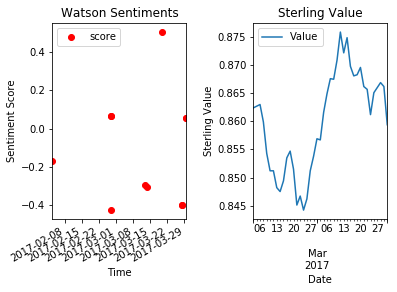

In [175]:
#directive so IPython displays plots in notebook cell
#%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2)

watson_dfs[0].plot(x='date', y='score', style='ro',ax=axes[0])
financial_data.plot(x="Date",ax=axes[1])

fig.subplots_adjust(wspace=0.5)

axes[0].set_title("Watson Sentiments")
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Sentiment Score')
axes[1].set_title("Sterling Value")
axes[1].set_ylabel('Sterling Value')



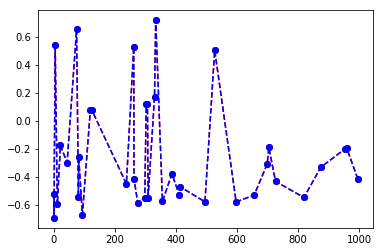

In [176]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# get scores for a given media provider
col = ax1.plot(watson_dfs[1]['score'], picker=True, marker='o', linestyle='--', color='r')
col = ax1.plot(watson_dfs[1]['score'], picker=True, marker='o', linestyle='--', color='b')



5

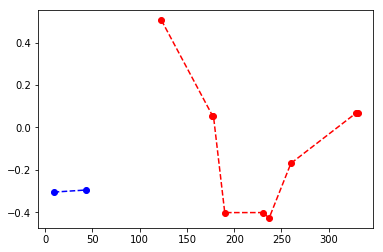

In [177]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# get scores for a given media provider
col = ax1.plot(watson_dfs[0].loc[watson_dfs[0]['host'] == 'www.bloomberg.com', 'score'], picker=True, marker='o', linestyle='--', color='r')
col = ax1.plot(watson_dfs[0].loc[watson_dfs[0]['host'] == 'www.theguardian.com', 'score'], picker=True, marker='o', linestyle='--', color='b')

fig.canvas.mpl_connect('pick_event', lambda event: onclick(event, watson_df))

